In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hmlstm_network import HMLSTMNetwork
import tensorflow as tf
from text_input_utils import prepare_inputs
import tensorflow as tf
from string import ascii_lowercase

%matplotlib inline
%load_ext autoreload
%autoreload 2

### Regression example

In [16]:
# simulate multiresolution data
num_signals = 100
signal_length = 300
x = np.linspace(0, 120 * np.pi, signal_length)
signals = [np.random.normal(0, .5, size=signal_length) +
           (2 * np.sin(.6 * x + np.random.random() * 100 * np.pi))
           + (5 * np.sin(.1* x + np.random.random() * 100 * np.pi))
           +( 10 * np.sin(.03 * x + np.random.random() * 100 * np.pi))
    for _ in range(num_signals)]

split = int(num_signals * .8)
train = signals[:split]
test = signals[split:]

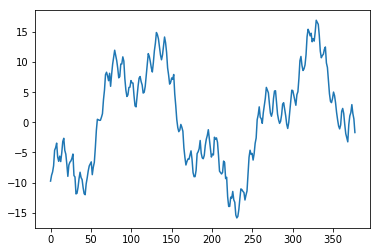

In [17]:
# example signal
plt.plot(x, signals[2]);

In [18]:
# prepare data
train_batches_in = []
train_batches_out = []
batch_size = 1
start = 0
while start + batch_size < len(train):
    batch = train[start: start + batch_size]
    
    train_batches_in.append(np.array([s[:-1] for s in batch]).reshape(batch_size, -1, 1))
    train_batches_out.append(np.array([s[1:] for s in batch]).reshape(batch_size, -1, 1))

    start += batch_size
    
    
batch_size = 1
start = 0
test_batches_in = []
test_batches_out = []
while start + batch_size < len(test):
    batch = test[start: start + batch_size]
    
    test_batches_in.append(np.array([s[:-1] for s in batch]).reshape(batch_size, -1, 1))
    test_batches_out.append(np.array([s[1:] for s in batch]).reshape(batch_size, -1, 1))

    start += batch_size

In [5]:
tf.reset_default_graph()
network = HMLSTMNetwork(input_size=1, task='regression', hidden_state_sizes=100,
                       embed_size=100, out_hidden_size=100, num_layers=3)

In [19]:
network.train(train_batches_in, train_batches_out, load_existing_vars=True, epochs=3)

loading variables...
INFO:tensorflow:Restoring parameters from ./hmlstm.ckpt
Epoch 0
loss: 716.068
loss: 530.886
loss: 632.767
loss: 559.6
loss: 561.074
loss: 409.643
loss: 501.308
loss: 483.869
loss: 372.73
loss: 420.401
loss: 397.263
loss: 438.107
loss: 440.197
loss: 449.313
loss: 412.359
loss: 392.996
loss: 393.731
loss: 441.796
loss: 468.784
loss: 409.663
loss: 426.333
loss: 396.361
loss: 354.507
loss: 363.108
loss: 403.114
loss: 376.417
loss: 379.726
loss: 390.495
loss: 427.164
loss: 355.851
loss: 428.086
loss: 397.905
loss: 394.361
loss: 356.722
loss: 407.766
loss: 422.309
loss: 376.125
loss: 393.935
loss: 371.637
loss: 338.846
loss: 398.043
loss: 340.216
loss: 405.726
loss: 350.492
loss: 392.721
loss: 412.674
loss: 374.362
loss: 352.314
loss: 364.634
loss: 348.536
loss: 356.388
loss: 333.729
loss: 372.665
loss: 379.808
loss: 358.027
loss: 314.376
loss: 386.949
loss: 350.142
loss: 341.895
loss: 362.934
loss: 323.616
loss: 327.872
loss: 400.727
loss: 285.152
loss: 358.05
loss: 361

In [30]:
batch_num = 3

In [31]:
boundaries = network.predict_boundaries(test_batches_in[batch_num][0])
print(boundaries[0])

loading variables...
INFO:tensorflow:Restoring parameters from ./hmlstm.ckpt
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.
   1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  

In [32]:
# test that indicators are valid
# TODO: figure out why first element is sometimes invalid
b = boundaries[0]
for l in range(1, len(b)):
    for i in range(1, len(b[0])):
        if b[l][i] == 1.:
            if b[l][i - 1] == 0.\
            and b[l - 1][i] == 0. \
            and b[l - 1][i - 1] == 0.:
                print(l, i)
                raise ValueError("Something's not right")

In [33]:
predictions = network.predict(test_batches_in[batch_num][0])

loading variables...
INFO:tensorflow:Restoring parameters from ./hmlstm.ckpt


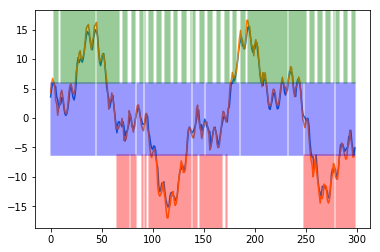

In [34]:
plt.plot(predictions.flatten())
plt.plot(test_batches_in[batch_num][0][1:])

colors = ['r', 'b', 'g', 'o']
for l, layer in enumerate(boundaries[0]):
    for i, indicator in enumerate(layer):
        if indicator == 1.:
            p = 1 / len(boundaries[0])
            plt.axvline(i, color=colors[l], ymin=(p*l), ymax=(p*(l + 1)), alpha=.3)

In [ ]:
network.

### Text classificaiton example

In [ ]:
tf.reset_default_graph()
network = HMLSTMNetwork(output_size=29, input_size=29,
                        embed_size=1024, out_hidden_size=500,
                        hidden_state_sizes=200)

In [ ]:
batch_size = 2
truncate_len = 100
num_layers = 3
num_batches = 100

inputs = prepare_inputs(
    batch_size=batch_size, truncate_len=truncate_len, num_batches=num_batches)

In [ ]:
# test on last input\
network.train(inputs[0][:-1], inputs[1][:-1], load_existing_vars=True)

In [51]:
# predictions on last input
indicators = network.predict_boundaries(inputs[0][-1][0], reuse=True)
indicators

array([[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

In [ ]:
# predictions on last input
predictions = network.predict(inputs[0][-1][0], reuse=True)

In [ ]:
def get_text(encoding):
    prediction = ''
    
    for char in np.squeeze(encoding):
        max_likelihood = np.where(char == np.max(char))[0][0]
        if max_likelihood < 26:
            prediction += ascii_lowercase[max_likelihood]
        elif max_likelihood == 26:
            prediction += ','
        elif max_likelihood == 27:
            prediction += '.'
        elif max_likelihood == 28:
            prediction += ' '
    
    return prediction

In [48]:
get_text(predictions)

'erl   nd ahes aoouene  ah te as eres eng   s ahrrl aetantanh ah tas  as   hhethaou  aooanthahh  oter'

In [49]:
get_text(inputs[0][-1][0][1:])

'ell. and this promises to be interesting. it would be a pity to miss it.   but your client     neve'